# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('/Users/deeptiguruprasad/Documents/MIT DS ML/Project1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
# The number of rows and columns can be determined by using the shape method
df.shape

(1898, 9)

#### Observations:
The DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data types of the 9 columns are as described below: <br>

- There are three different data types: int64 (represents numerical variables), float64 (represents numerical variables), and object (represents categorical variables).
- There are five numerical columns: *order_id*, *customer_id*, *cost*, *food_preparation_time*, and *delivery_time*.
- The rest of the columns are categorical: *restaurant_name*, *cuisine_type*, *day_of_the_week*, and *rating*.
- Oddly, *rating* is a categorical variable here. This might be due to non-numerical entries or inconsistent formatting in the column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
# Missing Values can be identified using isnull
df.isnull().sum()
# Alternatively, df.isnull().values.any()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- Missing values refer to any blank cells in the dataset where information is absent.
- The output of the above code (False) indicates that there are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
# using describe function to summarize the statistics
df["food_preparation_time"].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
- The minimum and maximum of the time it takes for the food to be prepared after the order is placed is 20 minutes and 35 minutes correspondingly.
- The average time it takes for food preparation is approximately 27.5 minutes.

### **Question 5:** How many orders are not rated?

In [8]:
# To identify orders that are not rated, we will check the different values stored in the rating column using the unique method
df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [9]:
count_not_rated = df[df['rating'] == 'Not given'].shape[0]
print(count_not_rated)

736


#### Observations:
- It appears from the unique values stored in *rating* is that if the value stored is 'Not given', the rating is not provided.
- The total number of orders that were not rated is the count of number of 'Not given' in the column which is 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

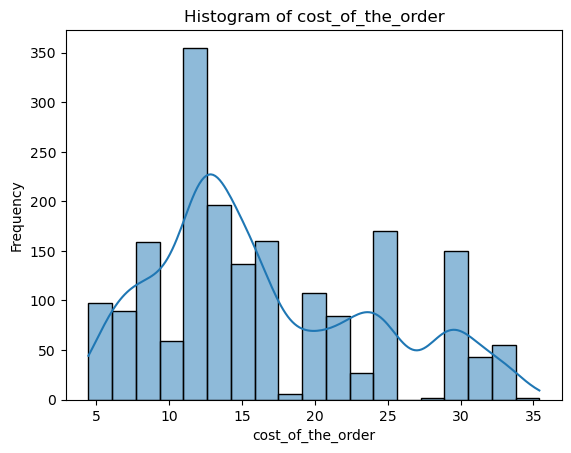

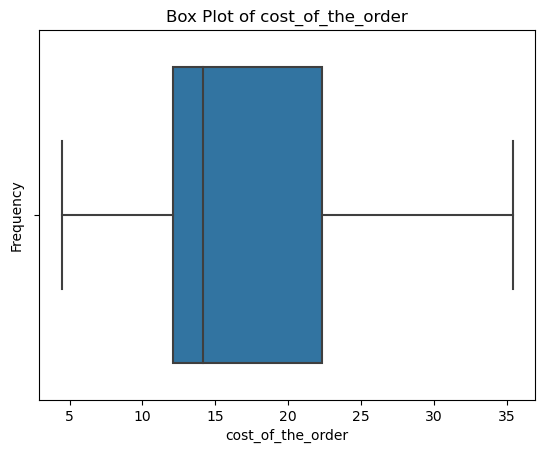

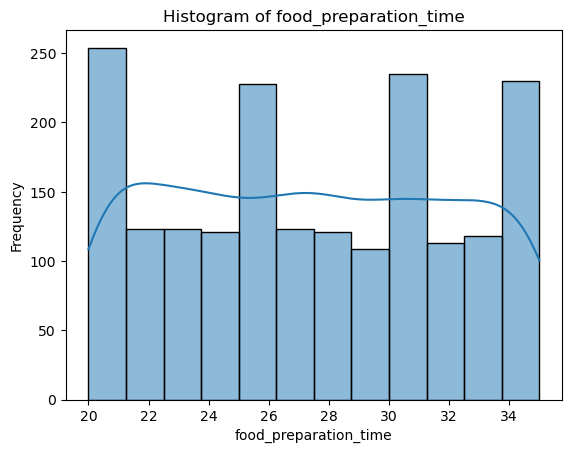

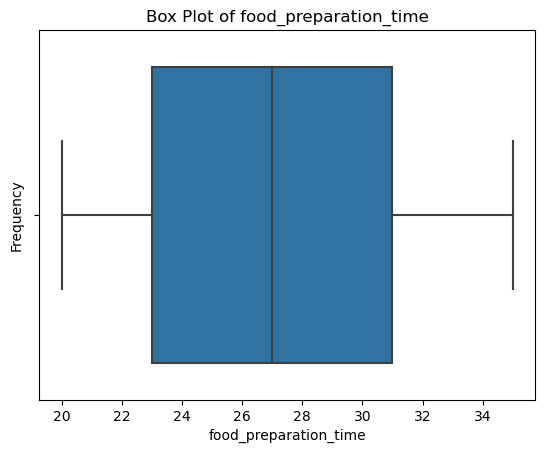

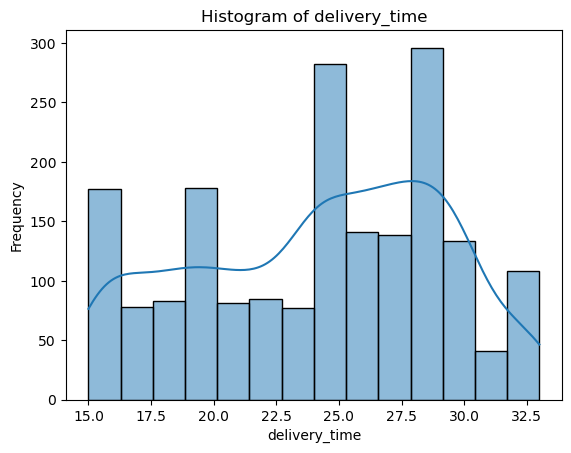

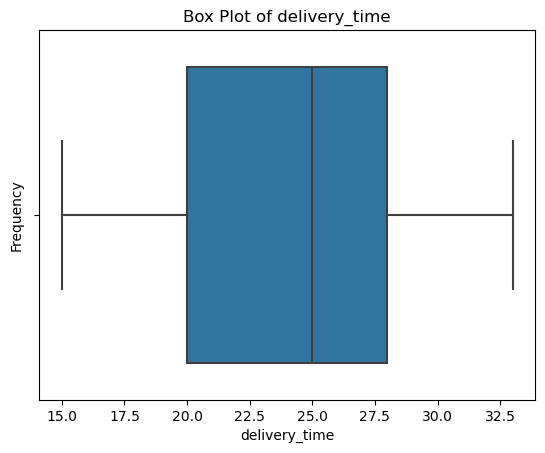

In [10]:
#Numerical Variables

#histogram and boxplot of cost of the orders

sns.histplot(df["cost_of_the_order"], kde=True)
plt.title(f'Histogram of cost_of_the_order')
plt.xlabel("cost_of_the_order")
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['cost_of_the_order'])
plt.title(f'Box Plot of cost_of_the_order')
plt.xlabel("cost_of_the_order")
plt.ylabel('Frequency')
plt.show()

#histogram and boxplot of food_preparation_time

sns.histplot(df["food_preparation_time"], kde=True)
plt.title(f'Histogram of food_preparation_time')
plt.xlabel("food_preparation_time")
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['food_preparation_time'])
plt.title(f'Box Plot of food_preparation_time')
plt.xlabel("food_preparation_time")
plt.ylabel('Frequency')
plt.show()

#histogram and boxplot of delivery_time

sns.histplot(df["delivery_time"], kde=True)
plt.title(f'Histogram of delivery_time')
plt.xlabel("delivery_time")
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['delivery_time'])
plt.title(f'Box Plot of delivery_time')
plt.xlabel("delivery_time")
plt.ylabel('Frequency')
plt.show()


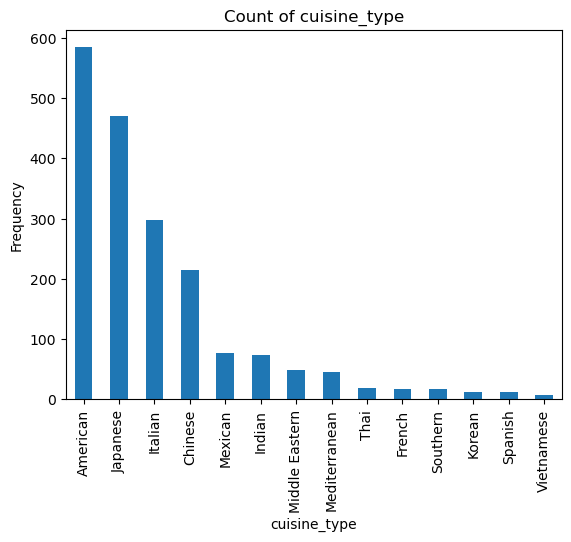

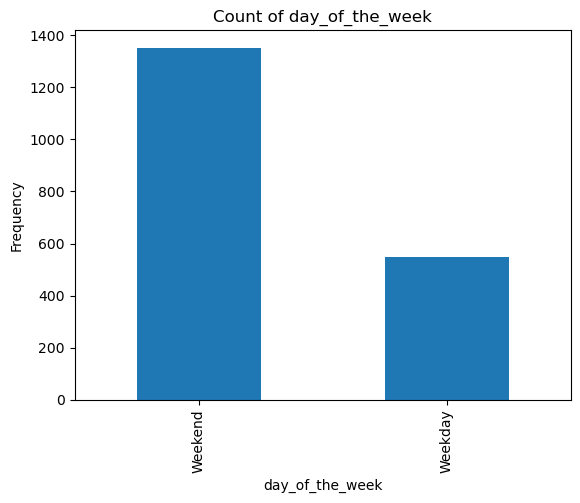

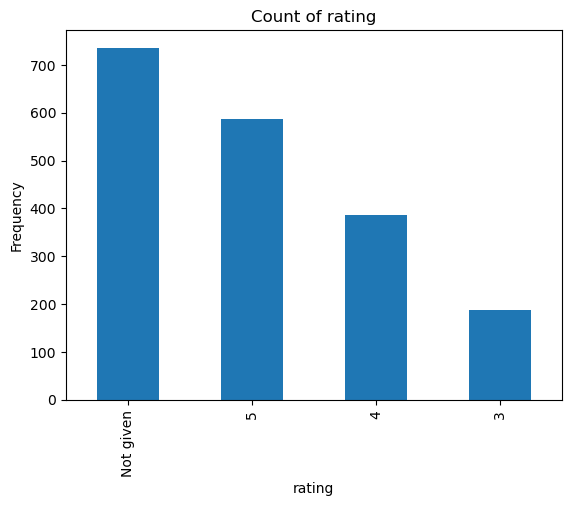

In [11]:
#Categorical Variables

#bar chart for cuisine_type
df["cuisine_type"].value_counts().plot(kind='bar')
plt.title(f'Count of cuisine_type')
plt.xlabel("cuisine_type")
plt.ylabel('Frequency')
plt.show()

#bar chart for the day of the week
df["day_of_the_week"].value_counts().plot(kind='bar')
plt.title(f'Count of day_of_the_week')
plt.xlabel("day_of_the_week")
plt.ylabel('Frequency')
plt.show()

#bar chart for rating
df["rating"].value_counts().plot(kind='bar')
plt.title(f'Count of rating')
plt.xlabel("rating")
plt.ylabel('Frequency')
plt.show()

### Observations 

#### Categorical Variables: 
- **cuisine_type**: The graph of various cuisine types show that the most preferred cuisine among customers is American and the least preferred is Vientnamese. The majority of the people buy American, Japanese, Italian or Chinese cuisines.
- **day_of_the_week**: The visual clearly shows that number of orders on weekends is more than double the number of orders on weekdays.
- **rating**: As we can observe from the graph, the highest category is not given implying that over 700 customers did not leave a rating. ratings 5 and 4 are higher than rating 3. There are no ratings less than 3.

#### Numerical Variables: 
- **cost_of_the_order**: The distribution of the cost of orders shows that most orders cost between 10 and 20 dollars with a peak near 12 dollars.The median cost of orders is approximately 14 dollars.
- **food preparation time**: The distribution of food preparation time is uniform in the interval 20 and 35 minutes. The median preparation time is approximately 27 minutes.
- **delivery_time**: The distribution of delvery time shows that almost all deliveries are completed within 30 mins with peak between 27.5 and 30 minutes.The median delivery time is around 25 minutes.
- In general, for numerical variables, there are no outliers as seen in the box plots.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [12]:
# valuecount of restaurants can give us the number of orders per restaurant
top_5_restaurants=df["restaurant_name"].value_counts().head(5)
print(top_5_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
- Shake Shack is the most popular with 219, while Parm has the lowest count at 68.
- Blue Ribbon's sushi (119) and fried chicken (96) offerings show brand versatility, with sushi slightly more favored.
- The Meatball Shop (132) and Parm perhaps could grow by expanding their menus or marketing efforts.

### **Question 8**: Which is the most popular cuisine on weekends?

In [13]:
weekendorders= df[df['day_of_the_week'].isin(['Weekend'])]
weekendorders["cuisine_type"].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
As we can see from the count of orders on weekends, the most ordered cuisine still remains American cuisine! People seem to like American cuisine, followed by Japenese, Italian and Chinese. The top six cuisine choices remain unchanged for weekday or weekend.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [33]:
 #number of orders with cost>20
x= df[df["cost_of_the_order"]>20].shape[0]

 #total number of orders
y=df["cost_of_the_order"].shape[0]

percentage = (x/y) * 100
print("Total Orders",df.shape[0],"\nOrders costing more than 20 dollars",x,"\nPercent of orders more than 20 dollars",round(percentage,2),"%")


Total Orders 1898 
Orders costing more than 20 dollars 555 
Percent of orders more than 20 dollars 29.24 %


#### Observations:
The total orders in the dataset is 1898. The number of orders that cost more than 20 dollars is 555. The percentage of orders that cost more than 20 dollars is 29.24%, suggesting about a third of the orders cost more than $20.

### **Question 10**: What is the mean order delivery time?

In [34]:
print("Mean Delivery Time is",round(df["delivery_time"].mean(),3),"minutes")

Mean Delivery Time is 24.162 minutes


#### Observations:
The average time taken by the delivery person to deliver the food package is approximately 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [35]:
# number of customers by orders placed.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
To find the number of customers that have placed the highest orders, we count the number of time the customer_id is present in the dataset. Customer ID 52832 has placed the highest number of orders followed by 47440 with 10 orders and 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

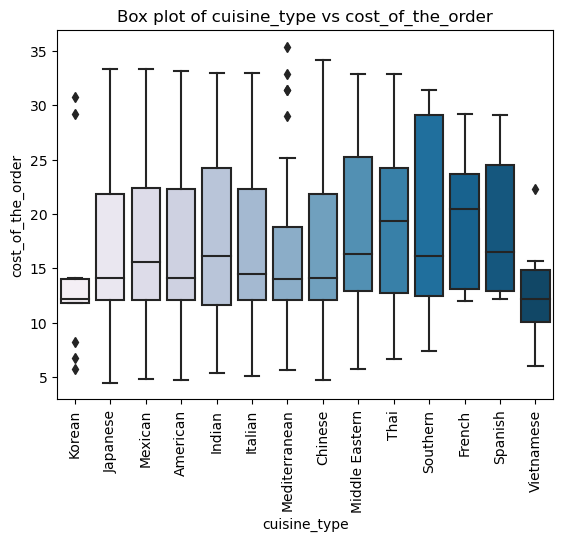

In [36]:
#cuisine type vs cost of the order

sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.title(f'Box plot of cuisine_type vs cost_of_the_order')
plt.xlabel("cuisine_type")
plt.ylabel('cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

### Observations:

- The typical cost for ordering from different cuisines is between 10 and 20 dollars.
- Most of the costs of orders are spread evenly in height, suggesting similar variablity in order costs, except Korean, Vietnamese and Mediterranean.
- For most cuisines, consumers are willing to spend a similar amount regardless of cuisine suggesting a uniform budget for food orders.



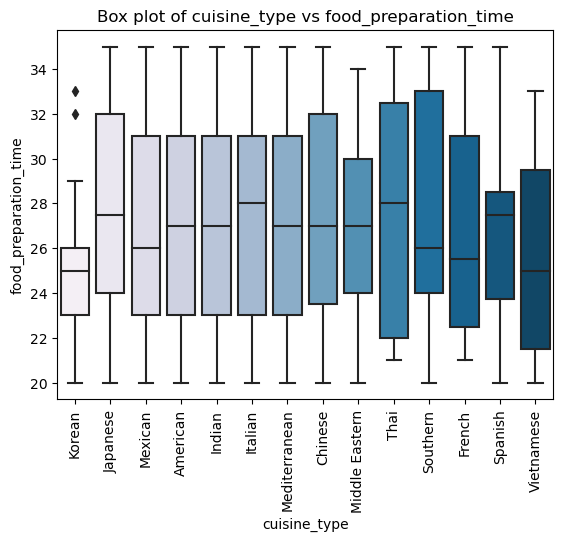

In [37]:
# cuisine type and food preparation time
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.title(f'Box plot of cuisine_type vs food_preparation_time')
plt.xlabel("cuisine_type")
plt.ylabel('food_preparation_time')
plt.xticks(rotation=90)
plt.show()

### Observations:

- The food preparation times are similar for most cuisines except, Korean and Spanish.
- There are a few outliers for Korean cuisine indicating, there are few dishes which take up more time than usual.

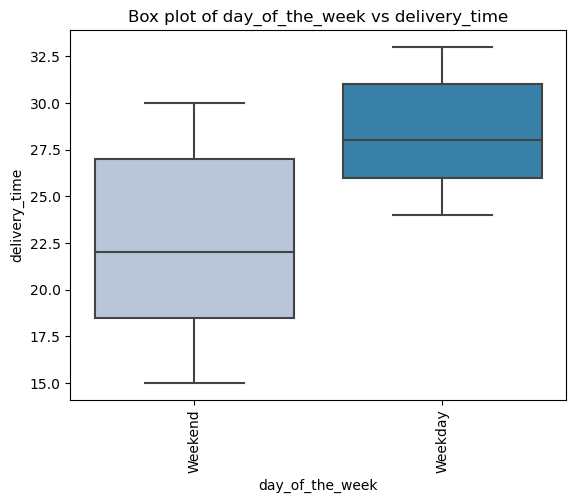

In [38]:

# day of the week and food delivery time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.title(f'Box plot of day_of_the_week vs delivery_time')
plt.xlabel("day_of_the_week")
plt.ylabel('delivery_time')
plt.xticks(rotation=90)
plt.show()

### Observations:
- On weekends, it takes lesser time to delivery the food as compared to weekdays.
- The typical delivery time on weekdays and weeknds differs. This may be due to lesser traffic on weekends.

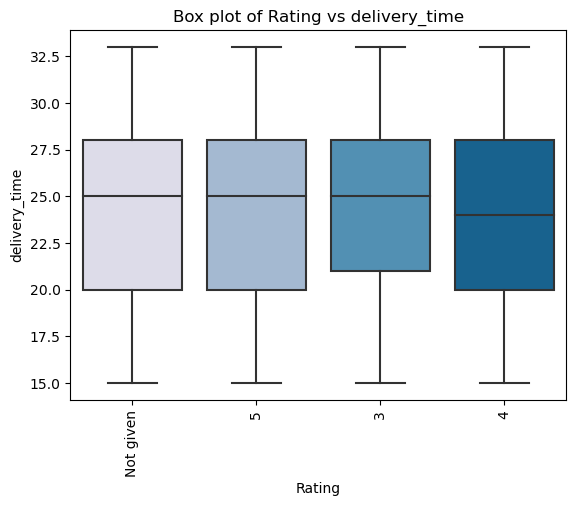

In [39]:
#Rating vs Delivery time

sns.boxplot(x = "rating", y = "delivery_time", data = df, palette = 'PuBu')
plt.title(f'Box plot of Rating vs delivery_time')
plt.xlabel("Rating")
plt.ylabel('delivery_time')
plt.xticks(rotation=90)
plt.show()

#### Observations:
- The median delivery time for ratings 3,5 and 'Not given' is the same around 25 minutes, Ratings of 3 and 5 having the same delivery time indicate that the rating may not be related to the delivery time, perhaps the taste of food.
- Ratings of 4 have a lower median delivery time.

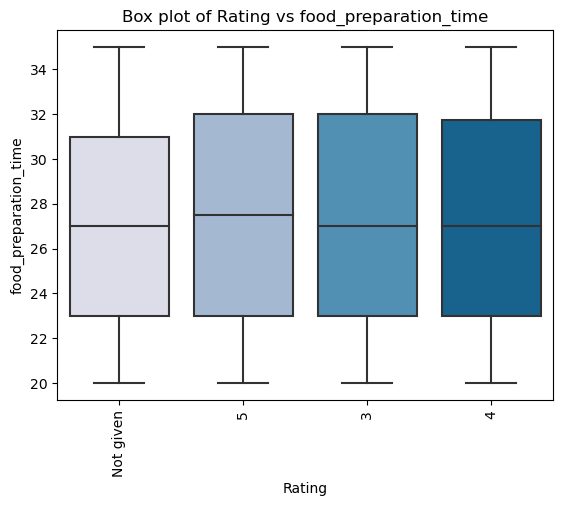

In [40]:
#Rating vs Food preparation time
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.title(f'Box plot of Rating vs food_preparation_time')
plt.xlabel("Rating")
plt.ylabel('food_preparation_time')
plt.xticks(rotation=90)
plt.show()

### Observations:
- Median food preparation time when compared to food ratings do not seem to vary a lot. The median food preparation time is between 26 and 28 minutes.
- This indicates that ratings are not fully related to the rating.

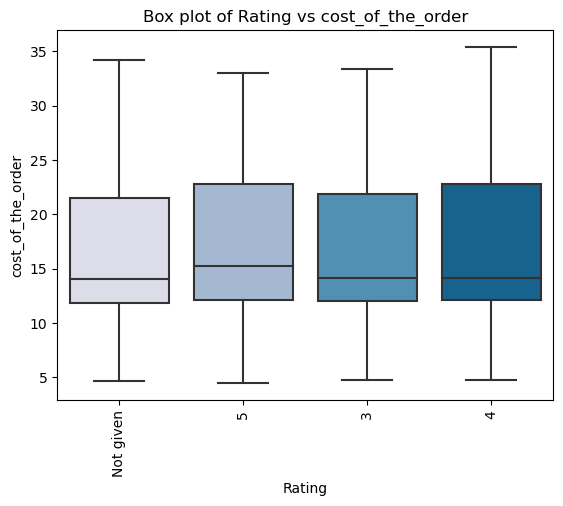

In [41]:
#Rating vs Cost of the order
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.title(f'Box plot of Rating vs cost_of_the_order')
plt.xlabel("Rating")
plt.ylabel('cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

### Observations:
- The median cost of orders is lower for the ratings 3 and 4, when compared to rating 5. This may be due to the fact that if the orders are expensive they taste good.

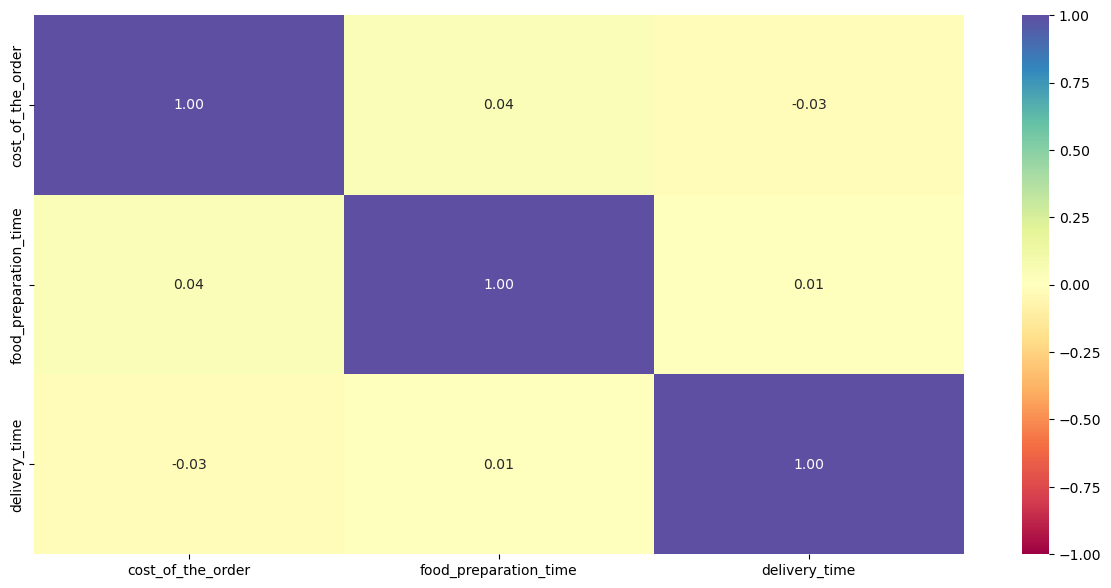

In [42]:
#Correlation among variables

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations
- Cost of the order and delivery time are inversely correlated, indicating if the order cost is high, the food delivery time is low.
- Food preparation time vs both delivery time and cost of the order are positively correlated, meaning if one variable increases other also increases. In our case, cost of the order increases faster than delivery_time in comparison to food preparation time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [43]:
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [44]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_ratings= df_mean_4.groupby('restaurant_name')['rating'].mean().sort_values(ascending = False).reset_index()

## Complete the code to find the mean rating
df_mean_ratings

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
All listed restaurants—Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop—qualify for the promotional offer with more than 50 ratings and average ratings above 4. The Meatball Shop has the highest average rating at 4.511905, indicating strong customer satisfaction across the board.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [45]:
def charge(x):
  if x>20:
    return x*0.25
  elif x>5:
    return x*0.15
  else:
    return x*0

df['comp_revenue']=df['cost_of_the_order'].apply(charge)

net_revenue = df['comp_revenue'].sum()
print('The net revenue is around $', round(net_revenue, 2))

The net revenue is around $ 6166.3


#### Observations:
The total revenue made by the company across all the orders is 6166.3 dollars. The company makes more money on orders over 20 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [46]:
df['total_time_taken'] = df['food_preparation_time'] + df['delivery_time']
# total orders with time greater than 60 minutes
orders_60 = df[df['total_time_taken']>60].shape[0]
total_orders = df.shape[0]

print("The percentage of ordered taking more than 60 minutes is", round((orders_60/total_orders)*100,2),"%")


The percentage of ordered taking more than 60 minutes is 10.54 %


#### Observations:
About 10.5% of orders take more than an hour to be delivered. This may be due to the time it takes to prepare the order or the traffic.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [47]:
weekday_delivery_time = df[df["day_of_the_week"]=="Weekday"]
print("Weekday Delivery Time Average", round(weekday_delivery_time["delivery_time"].mean(),2))

Weekday Delivery Time Average 28.34


In [48]:
weekend_delivery_time = df[df["day_of_the_week"]=="Weekend"]
print("Weekend Delivery Time Average", round(weekend_delivery_time["delivery_time"].mean(),2))


Weekend Delivery Time Average 22.47


#### Observations:
Based on the average delivery times:
- Weekdays: 28.34 minutes
- Weekends: 22.47 minutes
- Delivery times are shorter on weekends compared to weekdays. This may be due to lighter traffic on weekends may result in quicker deliveries or orders on weekends might be concentrated in areas with shorter travel distances.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  **Customer Preferences** American Cuisine is the most popular, followed by Japanese, Italian and Chinese cuisines.
* **Orders** are significantly higher on weekends compared to weekdays.
* **Order Cost**, majority of the orders cost between 10 and 20 dollars. About 30% of the orders cost more than $20.
* **Delivery Time** The mean delivery time is approximately 24 minutes. Delivery times are shorter on weekends (22.47 minutes) compared to weekdays (28.34 minutes).
* **Preparation Time** The average time to prepare the food is approximately 27.37 minutes. The time taken is relatively uniform across the cuisines with a median of around 27 minutes.
* **Customer Ratings**, a significant portion of the orders (736) were not rated. Among the rated orders, ratings of 4 and 5 are more frequent, indicating overall satisfaction.
* **Popular Restaurants**, Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants by order volume.
* **Revenue Highlights**, The net revenue generated by the company from comissions is approximately 6166.30 dollars. Orders costing more than 20 dollars contribute significantly to the revenue due to higher commission rates (25%).


### Recommendations:

*  **Enhancing Cuisine-Specific Strategies:**
  - **Promote Popular Cuisines:** focus on marketing American, Japanese, Italian, and Chinese cuisines. Feature these prominently in the app with special promotions or discounts.
  - **Boost Lesser-Known Cuisines:** Collaborate with restaurants offering Vietnamese, Korean, and Mediterranean cuisines to enhance their menus and promote unique dishes through targeted campaigns.
* **Leverage Customer Ratings:**
  - **Encourage Ratings:** implementing incentives for customers to rate their orders, such as discount vouchers or loyalty points.
  - **Analyze and Act on Feedback:** use the feedback to identify areas of improvement and work with the restaurants to address the issues, enhancing overall customer satification.
* **Support Top Restaurants:**
  - **Highlight Top Performers:** Give more visibility to top restaurants like Shake Shack and The Meatball Shop in the app, using features like "Top Rated" or "Most Popular".
  - **Collaborate for Promotions:** - Work with these restaurants to offer exclusive deals, boosting their sales and attracting more customers.
* **Enhance Customer Engagement:**
  - **Follow-Up Surveys** Send follow-up surveys to customers who did not rate their orders.
  - **Loyalty Programs** Implement loyalty programs to reward frequent customers, particulars who consistently order from highly rated restaurants.
* **Improve Operational Efficiency:**
    - **Streamline Preparation and Delivery** Collaborate with restaurants to reduce preparation times and enhance delivery logistics, ensuring timely deliveries especially on weekends.
    - **Maintain Quality Standards** Provide training and resources to restaurant partners to ensure consistent food quality and service, focusing on highly rated dishes.

By leveraging cuisine preferences and customer feedback, FoodHub can enhance its marketing strategies, improve customer satisfication and drive businees growth catering to customer preferences more effectively.

---